In [1]:
import pandas as pd
import plotly.express as px
import seaborn as sns

# Import packages for data visualization
import plotly.offline as py
import plotly.graph_objects as go
import networkx as nx

In [2]:
df = pd.read_csv('publication_processed.tsv',sep='\t')
df

,no,Year,Authors,Citation,publication,Score
0,16,1933,Bohr N.,Licht und Leben,Naturwissenschaften. 21: 245-250. DOI: 10.1007...,0.329
1,17,1930,Bohr N.,Die Atomtheorie und die Prinzipien der Naturbe...,Die Naturwissenschaften. 18: 73-78. DOI: 10.10...,0.409
2,18,1929,Bohr N.,Wirkungsquantum und Naturbeschreibung,Die Naturwissenschaften. 17: 483-486. DOI: 10....,0.363
3,19,1928,Bohr N.,The Quantum Postulate and the Recent Developme...,Nature. 121: 580-590. DOI: 10.1038/121580A0,0.310
4,20,1928,Bohr N.,Sommerfeld und die Atomtheorie,Die Naturwissenschaften. 16: 1036. DOI: 10.100...,0.319
...,...,...,...,...,...,...
550,18,1922,De Donder T,Review of La théorie de la relativité et ses a...,"Revue Universitaire Bruxelles, 1922",1.000
551,19,1922,De Donder T,"Review of L'éther actuel et ses précurseurs, b...","Revue Universitaire Bruxelles, 1922",1.000
552,1,1921,Wilson CTR.,III. Investigations on lighting discharges and...,Philosophical Transactions of the Royal Societ...,1.000
553,2,1923,Wilson CTR.,Investigations on X-rays and β-rays by the clo...,Proceedings of the Royal Society of London. Se...,1.000


In [3]:
df=df[['Year','Authors','Citation','publication']]
df['Authors'] = df['Authors'].apply(lambda s:s.upper())
df['Authors'] = df['Authors'].apply(lambda s:s.replace('.',''))
df['Year'] = df['Year'].apply(int)
df.drop_duplicates(inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 542 entries, 0 to 554
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Year         542 non-null    int64 
 1   Authors      542 non-null    object
 2   Citation     542 non-null    object
 3   publication  542 non-null    object
dtypes: int64(1), object(3)
memory usage: 21.2+ KB


/var/folders/7s/1rjbtv390js1cq8p7v16wvjc0000gn/T/ipykernel_13544/4103884488.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/var/folders/7s/1rjbtv390js1cq8p7v16wvjc0000gn/T/ipykernel_13544/4103884488.py:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/var/folders/7s/1rjbtv390js1cq8p7v16wvjc0000gn/T/ipykernel_13544/4103884488.py:4: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the d

In [4]:
df

,Year,Authors,Citation,publication
0,1933,BOHR N,Licht und Leben,Naturwissenschaften. 21: 245-250. DOI: 10.1007...
1,1930,BOHR N,Die Atomtheorie und die Prinzipien der Naturbe...,Die Naturwissenschaften. 18: 73-78. DOI: 10.10...
2,1929,BOHR N,Wirkungsquantum und Naturbeschreibung,Die Naturwissenschaften. 17: 483-486. DOI: 10....
3,1928,BOHR N,The Quantum Postulate and the Recent Developme...,Nature. 121: 580-590. DOI: 10.1038/121580A0
4,1928,BOHR N,Sommerfeld und die Atomtheorie,Die Naturwissenschaften. 16: 1036. DOI: 10.100...
...,...,...,...,...
550,1922,DE DONDER T,Review of La théorie de la relativité et ses a...,"Revue Universitaire Bruxelles, 1922"
551,1922,DE DONDER T,"Review of L'éther actuel et ses précurseurs, b...","Revue Universitaire Bruxelles, 1922"
552,1921,WILSON CTR,III. Investigations on lighting discharges and...,Philosophical Transactions of the Royal Societ...
553,1923,WILSON CTR,Investigations on X-rays and β-rays by the clo...,Proceedings of the Royal Society of London. Se...


[Text(0.5, 1.0, 'Publications Count Per Year')]

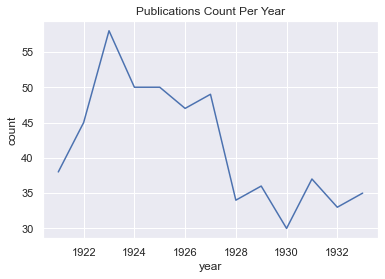

In [5]:
result = df.groupby('Year')['Citation'].agg({'count'})
result['year']=result.index

sns.set_theme(style="darkgrid")
sns.lineplot(data=result, x="year", y="count").set(title='Publications Count Per Year')

In [6]:
df.groupby('Year')['Citation'].agg({'count'}).describe()

,count
count,13.000000
mean,41.692308
std,8.567230
min,30.000000
25%,35.000000
50%,38.000000
75%,49.000000
max,58.000000


In [7]:
physicists = pd.read_csv('nodes_list.tsv',sep='\t')
# physicists['Published Name'] = physicists['Published Name'].apply(lambda s:s.upper())
# physicists.to_csv('nodes_list.tsv',sep='\t')
authors = physicists['Published Name'].dropna().to_list()

In [8]:
physicists

,Unnamed: 0,Surname,First Name,Published Name,Subjects
0,0,Bohr,Niels,BOHR N,"Electron models,Nuclear physics,Nuclear struct..."
1,1,Born,Max,BORN M,"Nuclear physics,Quantum mechanics,Wave mechanics"
2,2,Bragg,William Henry,BRAGG WH,"Atomic and molecular physics,Crystallography,X..."
3,3,Brillouin,Léon,BRILLOUIN L,"Atomic theory,Brillouin scattering,Electric co..."
4,4,Compton,Arthur Holly,COMPTON AH,"Atomic and molecular physics,Cosmic rays,Gamma..."
5,5,Curie,Marie,CURIE M,"Chemical elements,Medical physics,Nuclear phys..."
6,6,de Broglie,Louis,DE BROGLIE L,"Quantum mechanics,Quantum theory"
7,7,de Donder,Théophile,DE DONDER T,Thermodynamics
8,8,Debye,Peter,DEBYE P,"Adiabatiac processes,Atomic theory,Electrolyte..."
9,9,Dirac,Paul,DIRAC PAM,"Atomic and molecular physics,Particle physics,..."


In [9]:
physicists['Subjects']=physicists['Subjects'].apply(lambda s:s.split(','))
physicists_exploded=physicists.explode('Subjects')
physicists_exploded['Subjects'].value_counts()

Quantum mechanics               8
Nuclear physics                 6
Quantum theory                  5
Thermodynamics                  5
Atomic and molecular physics    5
Atomic theory                   4
Electromagnetism                4
X-rays                          3
Quantum physics                 3
Statistical mechanics           3
Solid state physics             3
Theoretical physics             3
Wave mechanics                  2
Gravity                         2
Chemistry                       2
Radioactivity                   2
Radiation -- Testing            2
Special relativity (Physics)    2
Electricity                     1
Statistical physics             1
Ferromagnetism                  1
Physical chemistry              1
Electron models                 1
Optics                          1
Neutrinos                       1
[]                              1
Photoemission                   1
Ions                            1
Thermal physics                 1
Thermionic emi

In [10]:
df['author_split']=df['Authors'].apply(lambda s:s.split(','))
df_exploded=df.explode('author_split')
df_exploded['author_split']=df_exploded['author_split'].apply(lambda s: s.strip())
df_exploded = df_exploded[df_exploded['author_split'].isin(authors)] 

/var/folders/7s/1rjbtv390js1cq8p7v16wvjc0000gn/T/ipykernel_13544/3992527836.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [11]:
count_by_author = df_exploded.groupby('author_split')['Citation'].agg({'count'}).sort_values(by='count',ascending=False)[:30]
count_by_author['author']=count_by_author.index
count_by_author

,count,author
author_split,,
COMPTON AH,71,COMPTON AH
LANGMUIR I,62,LANGMUIR I
BORN M,55,BORN M
HEISENBERG W,38,HEISENBERG W
BOHR N,33,BOHR N
EHRENFEST P,30,EHRENFEST P
GUYE CE,27,GUYE CE
EINSTEIN A,22,EINSTEIN A
FOWLER RH,21,FOWLER RH


In [12]:
fig = px.bar(count_by_author, x='author', y='count')
fig.show()

In [13]:
count_by_author_before = df_exploded[df_exploded['Year'] < 1928].groupby('author_split')['Citation'].agg({'count'}).sort_values(by='count',ascending=False)
count_by_author_before['author']=count_by_author_before.index
count_by_author_before['date'] = 'before conferences'

In [14]:
count_by_author_after = df_exploded[df_exploded['Year'] > 1927].groupby('author_split')['Citation'].agg({'count'}).sort_values(by='count',ascending=False)
count_by_author_after['author']=count_by_author_after.index
count_by_author_after['date'] = 'after conferences'

In [15]:
count_by_author=pd.concat([count_by_author_before,count_by_author_after])
fig = px.bar(count_by_author, x='author', y='count',color='date',title="Publications Count per Author Before and After the Conference")
fig.show()

In [18]:
import translators as ts
from langdetect import detect

df['lang'] = df['Citation'].apply(detect)
df['translate'] = df.apply(lambda s:ts.google(s['Citation']) if s['lang'] != 'en' else s['Citation'], axis=1)
df

Using Switzerland server backend.
/var/folders/7s/1rjbtv390js1cq8p7v16wvjc0000gn/T/ipykernel_13544/2456695390.py:4: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/var/folders/7s/1rjbtv390js1cq8p7v16wvjc0000gn/T/ipykernel_13544/2456695390.py:5: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



,Year,Authors,Citation,publication,author_split,lang,translate
0,1933,BOHR N,Licht und Leben,Naturwissenschaften. 21: 245-250. DOI: 10.1007...,[BOHR N ],de,Light and life
1,1930,BOHR N,Die Atomtheorie und die Prinzipien der Naturbe...,Die Naturwissenschaften. 18: 73-78. DOI: 10.10...,[BOHR N ],de,The nuclear theory and the principles of natur...
2,1929,BOHR N,Wirkungsquantum und Naturbeschreibung,Die Naturwissenschaften. 17: 483-486. DOI: 10....,[BOHR N ],de,Quantum of action and description of nature
3,1928,BOHR N,The Quantum Postulate and the Recent Developme...,Nature. 121: 580-590. DOI: 10.1038/121580A0,[BOHR N ],en,The Quantum Postulate and the Recent Developme...
4,1928,BOHR N,Sommerfeld und die Atomtheorie,Die Naturwissenschaften. 16: 1036. DOI: 10.100...,[BOHR N ],de,Sommerfeld and nuclear theory
...,...,...,...,...,...,...,...
550,1922,DE DONDER T,Review of La théorie de la relativité et ses a...,"Revue Universitaire Bruxelles, 1922",[DE DONDER T ],fr,Review of Relativity Theory and its Astronomy ...
551,1922,DE DONDER T,"Review of L'éther actuel et ses précurseurs, b...","Revue Universitaire Bruxelles, 1922",[DE DONDER T ],fr,"Review of current ether and its precursors, by..."
552,1921,WILSON CTR,III. Investigations on lighting discharges and...,Philosophical Transactions of the Royal Societ...,[WILSON CTR ],en,III. Investigations on lighting discharges and...
553,1923,WILSON CTR,Investigations on X-rays and β-rays by the clo...,Proceedings of the Royal Society of London. Se...,[WILSON CTR ],en,Investigations on X-rays and β-rays by the clo...


In [19]:
df.to_pickle('publications.pkl')

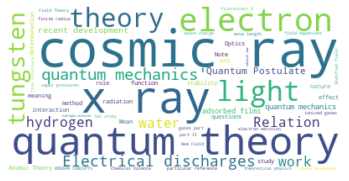

In [20]:
from PIL import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
import matplotlib.pyplot as plt

stopwords = set(STOPWORDS)
text = df[df['Year'] > 1927].translate.values
wordcloud = WordCloud(background_color="white",stopwords=stopwords,collocation_threshold = 3).generate(str(text))
plt.figure()
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()


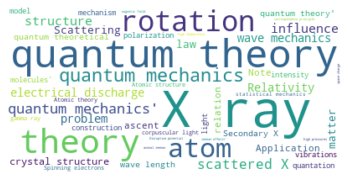

In [21]:
text = df[df['Year'] <= 1927].translate.values
wordcloud = WordCloud( background_color="white",stopwords=stopwords,collocation_threshold = 3).generate(str(text))
plt.figure()
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

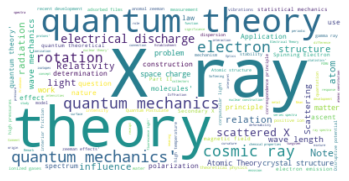

In [22]:
text = df.translate.values
wordcloud = WordCloud(background_color="white",stopwords=stopwords,collocation_threshold = 3).generate(str(text))
plt.figure()
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

In [23]:
df.to_pickle('publications.pkl')

In [24]:
co_authors=df[df['author_split'].apply(len) > 1][['author_split','Year']]
co_authors

,author_split,Year
9,"[BOHR N, KRAMERS HA, SLATER JC ]",1924
17,"[BOHR N, COSTER D ]",1923
24,"[PIAGGIO HTH, BOHR N ]",1923
29,"[PIAGGIO HTH, CAMPBELL NR, LORENTZ HA, RUTH...",1924
32,"[BORN M, MAYER JE ]",1932
...,...,...
529,"[JP JACOBSEN, KNUDSEN M ]",1921
533,"[M D'OCAGNE, G DARMOIS, DE DONDER T]",1928
534,"[DE DONDER T, T DONDER ]",1921
539,"[DE DONDER T, FH VAN DEN DUNGEN ]",1926


In [25]:
import itertools
# def construct_co_authors(lst_COA):
#     COA = []
#     for row in lst_COA:
#         for pair in itertools.combinations(row,2):
#             COA.append(pair)
#     return COA
list_coauthor=[]
for index, row in co_authors.iterrows():
    for pair in itertools.combinations(row['author_split'],2):
        temp=list(pair)
        temp.append(row['Year'])
        list_coauthor.append(tuple(temp))
            

#list_coauthor = construct_co_authors(co_authors)
df_co_author_edges = pd.DataFrame(list_coauthor, columns =['author', 'co-author','year'])
df_co_author_edges

,author,co-author,year
0,BOHR N,KRAMERS HA,1924
1,BOHR N,SLATER JC,1924
2,KRAMERS HA,SLATER JC,1924
3,BOHR N,COSTER D,1923
4,PIAGGIO HTH,BOHR N,1923
...,...,...,...
872,M D'OCAGNE,DE DONDER T,1928
873,G DARMOIS,DE DONDER T,1928
874,DE DONDER T,T DONDER,1921
875,DE DONDER T,FH VAN DEN DUNGEN,1926


In [26]:
df_co_author_edges = df_co_author_edges.applymap(lambda s: s.strip() if type(s) != type(1) else s)
df_co_author_edges['attribute'] = 'collaborate'

df_co_author_edges

,author,co-author,year,attribute
0,BOHR N,KRAMERS HA,1924,collaborate
1,BOHR N,SLATER JC,1924,collaborate
2,KRAMERS HA,SLATER JC,1924,collaborate
3,BOHR N,COSTER D,1923,collaborate
4,PIAGGIO HTH,BOHR N,1923,collaborate
...,...,...,...,...
872,M D'OCAGNE,DE DONDER T,1928,collaborate
873,G DARMOIS,DE DONDER T,1928,collaborate
874,DE DONDER T,T DONDER,1921,collaborate
875,DE DONDER T,FH VAN DEN DUNGEN,1926,collaborate


In [27]:
import networkx as nx

G = nx.from_pandas_edgelist(df_co_author_edges, source='author', target='co-author', edge_attr='attribute', create_using=nx.MultiGraph)


In [28]:
list(G.nodes())

textfile = open("a_file.txt", "w")
for element in list(G.nodes()):
    textfile.write(element + "\n")
textfile.close()

In [29]:
nx.get_edge_attributes(G, "attribute")
    

{('BOHR N', 'KRAMERS HA', 0): 'collaborate',
 ('BOHR N', 'SLATER JC', 0): 'collaborate',
 ('BOHR N', 'COSTER D', 0): 'collaborate',
 ('BOHR N', 'PIAGGIO HTH', 0): 'collaborate',
 ('BOHR N', 'PIAGGIO HTH', 1): 'collaborate',
 ('BOHR N', 'PIAGGIO HTH', 2): 'collaborate',
 ('BOHR N', 'CAMPBELL NR', 0): 'collaborate',
 ('BOHR N', 'CAMPBELL NR', 1): 'collaborate',
 ('BOHR N', 'LORENTZ HA', 0): 'collaborate',
 ('BOHR N', 'LORENTZ HA', 1): 'collaborate',
 ('BOHR N', 'RUTHERFORD E', 0): 'collaborate',
 ('BOHR N', 'RUTHERFORD E', 1): 'collaborate',
 ('BOHR N', 'DE BROGLIE M', 0): 'collaborate',
 ('BOHR N', 'DE BROGLIE M', 1): 'collaborate',
 ('BOHR N', 'MILLIKAN RA', 0): 'collaborate',
 ('BOHR N', 'MILLIKAN RA', 1): 'collaborate',
 ('BOHR N', 'ONNES HK', 0): 'collaborate',
 ('BOHR N', 'ONNES HK', 1): 'collaborate',
 ('BOHR N', 'WEISS P', 0): 'collaborate',
 ('BOHR N', 'WEISS P', 1): 'collaborate',
 ('BOHR N', 'BRILLOUIN L', 0): 'collaborate',
 ('BOHR N', 'BRILLOUIN L', 1): 'collaborate',
 ('BOH

In [30]:
# Get positions for the nodes in G
# pos_ = nx.spring_layout(G)
pos_ = nx.kamada_kawai_layout(G)


edge_x = []
edge_y = []
for edge in G.edges():
    x0, y0 = pos_[edge[0]]
    x1, y1 = pos_[edge[1]]
    edge_x.append(x0)
    edge_x.append(x1)
    edge_x.append(None)
    edge_y.append(y0)
    edge_y.append(y1)
    edge_y.append(None)

edge_trace = go.Scatter(
    x=edge_x, y=edge_y,
    line=dict(width=0.5, color='#888'),
    hoverinfo='none',
    mode='lines')

node_x = []
node_y = []
for node in G.nodes():
    x, y = pos_[node]
    node_x.append(x)
    node_y.append(y)

node_trace = go.Scatter(
    x=node_x, y=node_y,
    mode='markers',
    hoverinfo='text',
    marker=dict(
        showscale=True,
        # colorscale options
        #'Greys' | 'YlGnBu' | 'Greens' | 'YlOrRd' | 'Bluered' | 'RdBu' |
        #'Reds' | 'Blues' | 'Picnic' | 'Rainbow' | 'Portland' | 'Jet' |
        #'Hot' | 'Blackbody' | 'Earth' | 'Electric' | 'Viridis' |
        colorscale='YlGnBu',
        reversescale=True,
        color=[],
        size=10,
        colorbar=dict(
            thickness=15,
            title='Node Connections',
            xanchor='left',
            titleside='right'
        ),
        line_width=2))

In [31]:
node_adjacencies = []
node_text = []
node_lists = list(G.nodes)
for node, adjacencies in enumerate(G.adjacency()):
    node_adjacencies.append(len(adjacencies[1]))
    node_text.append(node_lists[node]+': of connections: '+str(len(adjacencies[1])))

node_trace.marker.color = node_adjacencies
node_trace.text = node_text

In [32]:
fig = go.Figure(data=[edge_trace, node_trace],
             layout=go.Layout(
                title='<br>Network graph made with Python',
                titlefont_size=16,
                showlegend=False,
                hovermode='closest',
                margin=dict(b=20,l=5,r=5,t=40),
                annotations=[ dict(
                    #text="Python code: <a href='https://plotly.com/ipython-notebooks/network-graphs/'> https://plotly.com/ipython-notebooks/network-graphs/</a>",
                    showarrow=False,
                    xref="paper", yref="paper",
                    x=0.005, y=-0.002 ) ],
                xaxis=dict(showgrid=False, zeroline=False, showticklabels=False),
                yaxis=dict(showgrid=False, zeroline=False, showticklabels=False))
                )
fig.show()

In [33]:
df_co_author_filter_edges=df_co_author_edges[df_co_author_edges['author'].isin(authors) & df_co_author_edges['co-author'].isin(authors) ]

In [34]:
df_co_author_filter_edges.to_csv('co-author-filter.csv')

In [35]:
G_filter = nx.from_pandas_edgelist(df_co_author_filter_edges, source='author', target='co-author', edge_attr='attribute', create_using=nx.MultiGraph)


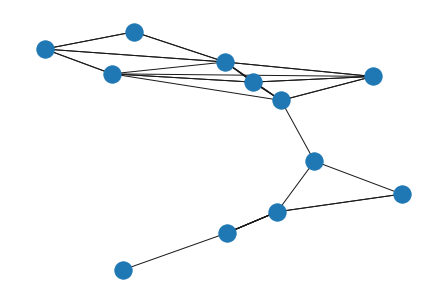

In [36]:
nx.draw(G_filter)

In [37]:
# Get positions for the nodes in G
# pos_ = nx.spring_layout(G)
pos_ = nx.kamada_kawai_layout(G_filter)


edge_x = []
edge_y = []
for edge in G_filter.edges():
    x0, y0 = pos_[edge[0]]
    x1, y1 = pos_[edge[1]]
    edge_x.append(x0)
    edge_x.append(x1)
    edge_x.append(None)
    edge_y.append(y0)
    edge_y.append(y1)
    edge_y.append(None)

edge_trace = go.Scatter(
    x=edge_x, y=edge_y,
    line=dict(width=0.5, color='#888'),
    hoverinfo='none',
    mode='lines')

node_x = []
node_y = []
for node in G_filter.nodes():
    x, y = pos_[node]
    node_x.append(x)
    node_y.append(y)

node_trace = go.Scatter(
    x=node_x, y=node_y,
    mode='markers',
    hoverinfo='text',
    marker=dict(
        showscale=True,
        # colorscale options
        #'Greys' | 'YlGnBu' | 'Greens' | 'YlOrRd' | 'Bluered' | 'RdBu' |
        #'Reds' | 'Blues' | 'Picnic' | 'Rainbow' | 'Portland' | 'Jet' |
        #'Hot' | 'Blackbody' | 'Earth' | 'Electric' | 'Viridis' |
        colorscale='YlGnBu',
        reversescale=True,
        color=[],
        size=10,
        colorbar=dict(
            thickness=15,
            title='Node Connections',
            xanchor='left',
            titleside='right'
        ),
        line_width=2))

In [38]:
node_adjacencies = []
node_text = []
node_lists = list(G_filter.nodes)
for node, adjacencies in enumerate(G.adjacency()):
    node_adjacencies.append(len(adjacencies[1]))
    node_text.append(node_lists[node]+': of connections: '+str(len(adjacencies[1])))

node_trace.marker.color = node_adjacencies
node_trace.text = node_text

IndexError: list index out of range

In [39]:
fig = go.Figure(data=[edge_trace, node_trace],
             layout=go.Layout(
                title='<br>Network graph made with Python',
                titlefont_size=16,
                showlegend=False,
                hovermode='closest',
                margin=dict(b=20,l=5,r=5,t=40),
                annotations=[ dict(
                    #text="Python code: <a href='https://plotly.com/ipython-notebooks/network-graphs/'> https://plotly.com/ipython-notebooks/network-graphs/</a>",
                    showarrow=False,
                    xref="paper", yref="paper",
                    x=0.005, y=-0.002 ) ],
                xaxis=dict(showgrid=False, zeroline=False, showticklabels=False),
                yaxis=dict(showgrid=False, zeroline=False, showticklabels=False))
                )
fig.show()

In [16]:
import prince
df_MCA=pd.read_csv('MCA.tsv',sep='\t')
df_MCA.index = df_MCA['Published Name']
df_MCA = df_MCA[df_MCA.columns[3:]]
df_MCA

,Nobel Prize in Physics,Nobel Prize in Physics After,Nobel Prize in Chemestry,Nobel Prize in Chemestry After,Attended 1st conference,Gave lecture during conference,1927 Scientific comitee,Phd Obtained,Professorship
Published Name,,,,,,,,,
BOHR N,1,0,0,0,0,1,0,1,1
BORN M,0,1,1,0,0,1,0,1,1
BRAGG WH,1,0,0,0,0,1,1,0,1
BRILLOUIN L,0,0,0,0,0,0,0,1,0
COMPTON AH,1,0,0,0,0,1,0,1,1
CURIE M,1,0,1,0,1,0,1,1,1
DE BROGLIE L,0,1,0,0,1,1,0,1,0
DE DONDER T,0,0,0,1,0,0,0,1,1
DEBYE P,0,0,0,1,0,0,0,1,1


In [17]:
mca = prince.MCA(
    n_components=2,
    n_iter=3,
    copy=True,
    check_input=True,
    engine='auto',
    random_state=42
)

mca = mca.fit(df_MCA)

ZeroDivisionError: float division by zero

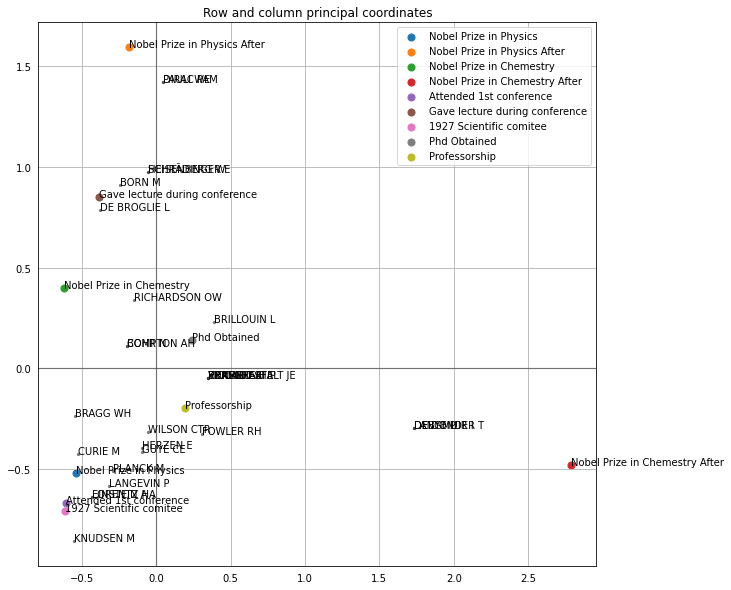

In [19]:
ax = mca.plot_coordinates(X=df_MCA, ax=None, figsize=(10,10),show_row_points=True, row_points_size=5, show_row_labels=True,
                          show_column_points=True, column_points_size=50, show_column_labels=True, legend_n_cols=1)


In [11]:
pca = prince.PCA(
    n_components=2,
    n_iter=3,
    rescale_with_mean=True,
    rescale_with_std=True,
    copy=True,
    check_input=True,
    engine='auto',
    random_state=42
)
pca = pca.fit(df_MCA)


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


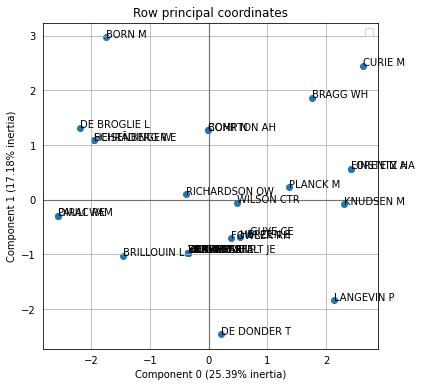

In [12]:
ax = pca.plot_row_coordinates(
    df_MCA,
    ax=None,
    figsize=(6, 6),
    x_component=0,
    y_component=1,
    labels=df_MCA.index,
    ellipse_outline=False,
    ellipse_fill=True,
    show_points=True
)
